In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
anomaly_data = pd.read_csv('data\для анализа\dataset._anomaly.csv', sep=';')
normal_data = pd.read_csv('data\для анализа\dataset._normal.csv', sep=';')
problem_data = pd.read_csv('data\для анализа\dataset._problems.csv', sep=';')

C:\Users\Полина\AppData\Local\Temp\ipykernel_5468\1743907147.py:2: DtypeWarning: Columns (3,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_data = pd.read_csv('data\для анализа\dataset._normal.csv', sep=';')
C:\Users\Полина\AppData\Local\Temp\ipykernel_5468\1743907147.py:3: DtypeWarning: Columns (3,11,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  problem_data = pd.read_csv('data\для анализа\dataset._problems.csv', sep=';')


In [4]:
anomaly_data.shape, normal_data.shape, problem_data.shape

((189704, 45), (892883, 45), (2263207, 45))

# Первичная очистка данных

Была произведена очистка и преобразование типов данных для дальнейшего использования

In [54]:
def preprocess_features(df):
    df['Значение счетчика моточасов, час:мин'] = df['Значение счетчика моточасов, час:мин'].apply(lambda x: float(str(x).split(':')[0]))

    df['Полож.пед.акселер.,%'] = df['Полож.пед.акселер.,%'].apply(lambda x: float(str(x).split(',')[0]))

    df['Обор.двиг.,об/мин'] = df['Обор.двиг.,об/мин'].apply(lambda x: float(str(x).split(',')[0]))

    df['Сост.пед.сцепл.'].replace('Отпущ.', 0, inplace = True)
    df['Сост.пед.сцепл.'].replace('Нажат.', 1, inplace = True)

    df['Нейтраль КПП (spn3843)'].replace('1', 1, inplace = True)
    df['Нейтраль КПП (spn3843)'].replace('0', 0, inplace = True)

    df['Стояночный тормоз (spn3842)'].replace('1', 1, inplace = True)
    df['Стояночный тормоз (spn3842)'].replace('0', 0, inplace = True)

    df['Засоренность воздушного фильтра (spn3840)'].replace('0', 0, inplace = True)
    df['Засоренность воздушного фильтра (spn3840)'].replace('1', 1, inplace = True)

    df['Засоренность фильтра КПП (spn3847)'].replace('1', 1, inplace = True)
    df['Засоренность фильтра КПП (spn3847)'].replace('0', 0, inplace = True)

    df['Засоренность фильтра ДВС (spn3845)'].replace('0', 0, inplace = True)
    df['Засоренность фильтра ДВС (spn3845)'].replace('1', 1, inplace = True)

    df['Засоренность фильтра рулевого управления (spn3844)'].replace('1', 1, inplace = True)
    df['Засоренность фильтра рулевого управления (spn3844)'].replace('0', 0, inplace = True)

    df['Засоренность фильтра навесного оборудования (spn3851)'].replace('1', 1, inplace = True)
    df['Засоренность фильтра навесного оборудования (spn3851)'].replace('0', 0, inplace = True)

    df['Недопустимый уровень масла в гидробаке (spn3850)'].replace('1', 1, inplace = True)
    df['Недопустимый уровень масла в гидробаке (spn3850)'].replace('0', 0, inplace = True)

    df['Аварийная температура масла в гидросистеме (spn3849)'].replace('1', 1, inplace = True)
    df['Аварийная температура масла в гидросистеме (spn3849)'].replace('0', 0, inplace = True)

    df['Аварийная температура охлаждающей жидкости (spn3841)'].replace('1', 1, inplace = True)
    df['Аварийная температура охлаждающей жидкости (spn3841)'].replace('0', 0, inplace = True)

    df['Аварийное давление в I контуре тормозной системы (spn3848)'].replace('1', 1, inplace = True)
    df['Аварийное давление в I контуре тормозной системы (spn3848)'].replace('0', 0, inplace = True)

    df['Аварийное давление в II контуре тормозной системы (spn3855)'].replace('1', 1, inplace = True)
    df['Аварийное давление в II контуре тормозной системы (spn3855)'].replace('0', 0, inplace = True)

    df['Зарядка АКБ (spn3854)'].replace('1', 1, inplace = True)
    df['Зарядка АКБ (spn3854)'].replace('0', 0, inplace = True)

    df['Отопитель (spn3853)'].replace('1', 1, inplace = True)
    df['Отопитель (spn3853)'].replace('0', 0, inplace = True)

    df['Выход блока управления двигателем (spn3852)'].replace('1', 1, inplace = True)
    df['Выход блока управления двигателем (spn3852)'].replace('0', 0, inplace = True)

    df['Включение тормозков (spn3859)'].replace('1', 1, inplace = True)
    df['Включение тормозков (spn3859)'].replace('0', 0, inplace = True)

    df['Засоренность фильтра слива (spn3858)'].replace('1', 1, inplace = True)
    df['Засоренность фильтра слива (spn3858)'].replace('0', 0, inplace = True)

    df['Аварийное давление масла КПП (spn3857)'].replace('1', 1, inplace = True)
    df['Аварийное давление масла КПП (spn3857)'].replace('0', 0, inplace = True)

    df['Аварийная температура масла ДВС(spn3856)'].replace('1', 1, inplace = True)
    df['Аварийная температура масла ДВС(spn3856)'].replace('0', 0, inplace = True)

    df['Аварийное давление масла ДВС (spn3846)'].replace('1', 1, inplace = True)
    df['Аварийное давление масла ДВС (spn3846)'].replace('0', 0, inplace = True)

    df['Неисправность тормозной системы (spn3863)'].replace('1', 1, inplace = True)
    df['Неисправность тормозной системы (spn3863)'].replace('0', 0, inplace = True)

    df['Термостарт (spn3862)'].replace('1', 1, inplace = True)
    df['Термостарт (spn3862)'].replace('0', 0, inplace = True)

    df['Разрешение запуска двигателя (spn3861)'].replace('1', 1, inplace = True)
    df['Разрешение запуска двигателя (spn3861)'].replace('0', 0, inplace = True)

    df['Низкий уровень ОЖ (spn3860)'].replace('1', 1, inplace = True)
    df['Низкий уровень ОЖ (spn3860)'].replace('0', 0, inplace = True)

    df['Аварийная температура масла ГТР (spn3867)'].replace('1', 1, inplace = True)
    df['Аварийная температура масла ГТР (spn3867)'].replace('0', 0, inplace = True)

    df['Необходимость сервисного обслуживания (spn3866)'].replace('1', 1, inplace = True)
    df['Необходимость сервисного обслуживания (spn3866)'].replace('0', 0, inplace = True)

    df['Подогрев топливного фильтра (spn3865)'].replace('1', 1, inplace = True)
    df['Подогрев топливного фильтра (spn3865)'].replace('0', 0, inplace = True)

    df['Вода в топливе (spn3864)'].replace('1', 1, inplace = True)
    df['Вода в топливе (spn3864)'].replace('0', 0, inplace = True)

    df['Холодный старт (spn3871)'].replace('1', 1, inplace = True)
    df['Холодный старт (spn3871)'].replace('0', 0, inplace = True)
    return df


columns = anomaly_data.columns
blank_cols = ['Нагрузка на двигатель, %',
 'iButton2',
 'Крутящий момент (spn513), Нм',
 'Положение рейки ТНВД (spn51), %',
 'Расход топлива (spn183), л/ч',
 'ДВС. Температура наддувочного воздуха, °С',
 'Давление наддувочного воздуха двигателя (spn106), кПа',
 'Текущая передача (spn523)',
 'Температура масла гидравлики (spn5536), С',
 'Педаль слива (spn598)']
def preprocess_data(df):
    df.replace('-273,000', -273, inplace=True)
    df.replace('-', np.nan, inplace=True)
    df.replace('        -', np.nan, inplace=True)
    df['Дата и время'] = pd.to_datetime(df['Дата и время'], format="%d/%m/%Y %H:%M:%S")
    df.drop(columns=blank_cols, inplace=True)
    df = preprocess_features(df)
    
    return df
anomaly_data = preprocess_data(anomaly_data)
normal_data = preprocess_data(normal_data)
problem_data = preprocess_data(problem_data)
columns = anomaly_data.columns

C:\Users\Полина\AppData\Local\Temp\ipykernel_5468\2740200993.py:113: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)
C:\Users\Полина\AppData\Local\Temp\ipykernel_5468\2740200993.py:114: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('        -', np.nan, inplace=True)
C:\Users\Полина\AppData\Local\Temp\ipykernel_5468\2740200993.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change 

In [55]:
anomaly_data.to_csv('preprocessed_anomaly_data.csv')
problem_data.to_csv('preprocessed_problem_data.csv')
normal_data.to_csv('preprocessed_normal_data.csv')

In [56]:
def oil(x):
    if type(x)==float:
        return x
    else:
        return int(str(x).split(',')[0])
def change_to_num(dataset):
    dataset['КПП. Температура масла'] = pd.to_numeric(dataset['КПП. Температура масла'])
    dataset['Давл.масла двиг.,кПа'] = pd.to_numeric(dataset['Давл.масла двиг.,кПа'])
    dataset['Темп.масла двиг.,°С'] = pd.to_numeric(dataset['Темп.масла двиг.,°С'].apply(lambda x: oil(x)))
    dataset['КПП. Давление масла в системе смазки'] = pd.to_numeric(dataset['КПП. Давление масла в системе смазки'])
    dataset['Скорость'] = pd.to_numeric(dataset['Скорость'])
    dataset['ДВС. Давление смазки'] = pd.to_numeric(dataset['ДВС. Давление смазки'])
    dataset['ДВС. Температура охлаждающей жидкости'] = pd.to_numeric(dataset['ДВС. Температура охлаждающей жидкости'])
    dataset['Давление в пневмостистеме (spn46), кПа'] = pd.to_numeric(dataset['Давление в пневмостистеме (spn46), кПа'])
    dataset['Уровень топлива % (spn96)'] = pd.to_numeric(dataset['Уровень топлива % (spn96)'])
    dataset['Электросистема. Напряжение'] = pd.to_numeric(dataset['Электросистема. Напряжение'])
    dataset['ДВС. Частота вращения коленчатого вала'] = pd.to_numeric(dataset['ДВС. Частота вращения коленчатого вала'])
    return dataset

In [57]:
normal_data = change_to_num(normal_data)

In [59]:
problem_data = change_to_num(problem_data)

In [60]:
problem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263207 entries, 0 to 2263206
Data columns (total 45 columns):
 #   Column                                                       Dtype         
---  ------                                                       -----         
 0   Дата и время                                                 datetime64[ns]
 1   Полож.пед.акселер.,%                                         float64       
 2   Давл.масла двиг.,кПа                                         float64       
 3   Темп.масла двиг.,°С                                          float64       
 4   Обор.двиг.,об/мин                                            float64       
 5   Значение счетчика моточасов, час:мин                         float64       
 6   Сост.пед.сцепл.                                              float64       
 7   КПП. Температура масла                                       float64       
 8   КПП. Давление масла в системе смазки                         float64    

пути к файлам с исходной информацией от операторов:

In [28]:
file_list = ['data\исходные данные от оператора\\022C4097\log(336804182)[26-03-2024_16-06-01] 01.06-01.07.csv', 
             'data\исходные данные от оператора\\022C4097\log(336804182)[26-03-2024_16-08-32] 01.07-01.08.csv',
             'data\исходные данные от оператора\\023T0569\log(336804727)[26-03-2024_16-11-37] 01.07-01.08.csv',
             'data\исходные данные от оператора\\023T0569\log(336804727)[26-03-2024_16-17-03] 01.06-01.07.csv',
             'data\исходные данные от оператора\\023Т0049\log(336804656)[27-03-2024_07-44-01] 01.06-01.07.csv',
             'data\исходные данные от оператора\\023Т0049\log(336804656)[27-03-2024_07-46-35]  01.07-01.08.csv',
             'data\исходные данные от оператора\\023Т0255\log(336805040)[26-03-2024_13-19-11] 01.08-01.09.csv',
             'data\исходные данные от оператора\\023Т0255\log(336805040)[26-03-2024_13-21-02] 01.09-01.10.csv',
             'data\исходные данные от оператора\\023Т0719\log(336807105)[26-03-2024_16-19-05] 01.06-01.07.csv',
             'data\исходные данные от оператора\\023Т0719\log(336807105)[26-03-2024_16-21-40] 01.07-01.08.csv',
             'data\исходные данные от оператора\C1969\log(336802313)[26-03-2024_15-59-36] 01.06-01.07.csv',
             'data\исходные данные от оператора\C1969\log(336802720)[26-03-2024_15-51-13] 01.05-01.06.csv',
             'data\исходные данные от оператора\Р3106\log(336044815)[26-03-2024_13-06-23] 01.08-01.09.csv',
             'data\исходные данные от оператора\Р3106\log(336044815)[26-03-2024_13-15-23] 01.07-01.08.csv',
             'data\исходные данные от оператора\С0790\log(336801558)[26-03-2024_13-30-07] 01.07-01.08.csv',
             'data\исходные данные от оператора\С0790\log(336801558)[26-03-2024_14-09-43] 01.06-01.07.csv',
             'data\исходные данные от оператора\С0873\log(336802058)[25-03-2024_16-30-37] 01.10-01.11.csv',
             'data\исходные данные от оператора\С0873\log(336802058)[25-03-2024_16-31-03] 01.09-01-10.csv',
             'data\исходные данные от оператора\С1067\log(336802167)[25-03-2024_17-01-54] 01.07-01.08.csv',
             'data\исходные данные от оператора\С1067\log(336802167)[26-03-2024_09-22-07] 01.06-06.06.csv',
             'data\исходные данные от оператора\С1067\log(336802167)[26-03-2024_09-29-02] 06.06-18.06.csv',
             'data\исходные данные от оператора\С1067\log(336802167)[26-03-2024_10-29-13] 18.06-30.06.csv',
             'data\исходные данные от оператора\С1178\log(336801334)[25-03-2024_16-39-11] 01.08-01.09.csv',
             'data\исходные данные от оператора\С1178\log(336801334)[25-03-2024_16-41-08] 01.09-01.10.csv',
             'data\исходные данные от оператора\С2177\log(336802953)[26-03-2024_16-33-14] 01.05-01.06.csv',
             'data\исходные данные от оператора\С2177\log(336802953)[26-03-2024_16-47-56] 01.06-01.07.csv',
             'data\исходные данные от оператора\С2586\log(336801531)[26-03-2024_10-59-04] 01.07-01.08.csv',
             'data\исходные данные от оператора\С2586\log(336801531)[26-03-2024_11-45-54] 01.08-01.09.csv',
             'data\исходные данные от оператора\С2627 7226ом61\log(336802983)[26-03-2024_16-24-22] 01.07-01.08.csv',
             'data\исходные данные от оператора\С2627 7226ом61\log(336802983)[26-03-2024_16-26-50] 01.06-01.07.csv',
             'data\исходные данные от оператора\С2627 7226ом61\log(336802983)[26-03-2024_16-29-06] 01.05-01.06.csv'
             ]

# Визуализация

Все данные из трех таблиц, с использованием информации о времени записи, были сгруппированы по тракторам. Затем для каждого из них были построены графики зависимости различных признаков от времени. 

In [34]:
def all_nans(row):
    return len(row) - 1 == row.isna().sum()

In [45]:
def temp_preprocess(df):
    cols_to_drop2 = columns[np.array([19, 20, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 39, 40, 42])]
    temp_data = df.drop(columns=cols_to_drop2)
    t_list = []
    for i in temp_data.columns:
        if len(temp_data[i].unique())==2 and float(0) in temp_data[i].unique():
            # print(i)
            t_list.append(i)
    temp_data.drop(columns=['Неисправность тормозной системы (spn3863)']+t_list, inplace=True)

    temp_data = temp_data[temp_data.apply(all_nans, axis=1)==False]

    name = np.zeros(len(temp_data))
    c = 0
    for i in range(len(temp_data)-1):
        name[i] = c
        if (temp_data.iloc[i + 1]['Дата и время'] - temp_data.iloc[i]['Дата и время']).total_seconds() > 3000:
            c+=1
    temp_data['name'] = name
    return temp_data
temp_norm = temp_preprocess(normal_data)
temp_prob = temp_preprocess(problem_data)
temp_anom = temp_preprocess(anomaly_data)

In [39]:
# cols_to_drop2 = columns[np.array([19, 20, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 39, 40, 42])]
# temp_norm = normal_data.drop(columns=cols_to_drop2)
# t_list = []
# for i in temp_norm.columns:
#     if len(temp_norm[i].unique())==2 and float(0) in temp_norm[i].unique():
#         print(i)
#         t_list.append(i)
# temp_norm.drop(columns=['Неисправность тормозной системы (spn3863)']+t_list, inplace=True)

# temp_norm = temp_norm[temp_norm.apply(all_nans, axis=1)==False]

# name = np.zeros(len(temp_norm))
# c = 0
# for i in range(len(temp_norm)-1):
#     name[i] = c
#     if (temp_norm.iloc[i + 1]['Дата и время'] - temp_norm.iloc[i]['Дата и время']).total_seconds() > 3000:
#         c+=1
# temp_norm['name'] = name

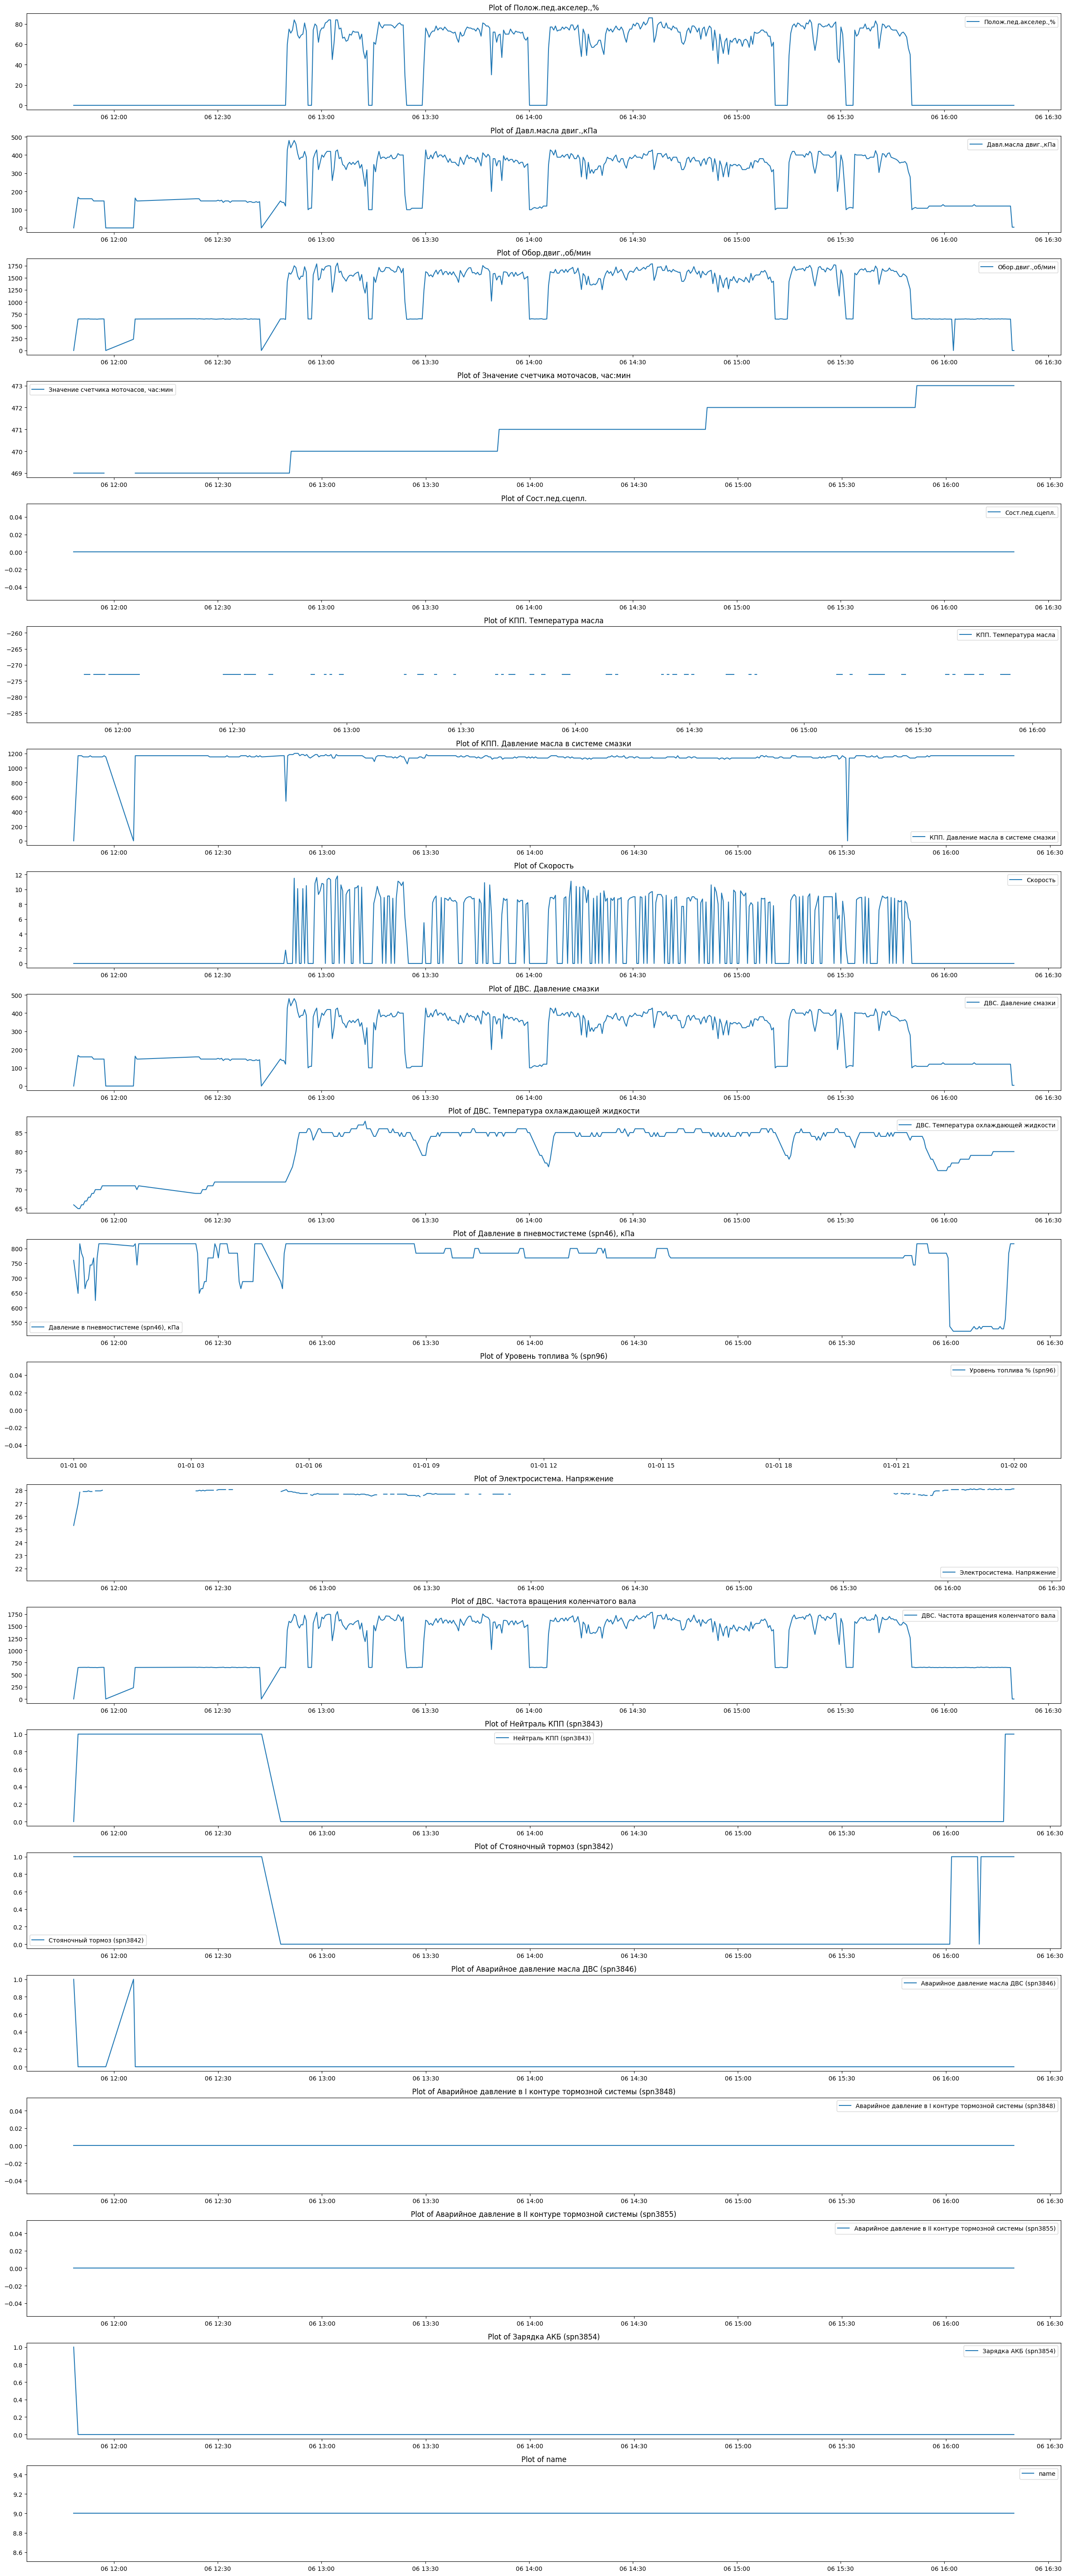

In [46]:
y_values = temp_norm.drop(columns='Темп.масла двиг.,°С').columns[1:]
fig, axs = plt.subplots(len(y_values), 1, figsize=(25, 60))
labels = temp_norm.drop(columns='Темп.масла двиг.,°С').columns[1:]

for i, (y, label) in enumerate(zip(y_values, labels)):
    axs[i].plot(temp_norm[temp_norm['name']==9]['Дата и время'], pd.to_numeric(temp_norm[temp_norm['name']==9][y]), label=label)
    axs[i].set_title(f'Plot of {label}')
    axs[i].legend()

plt.tight_layout()
plt.show()

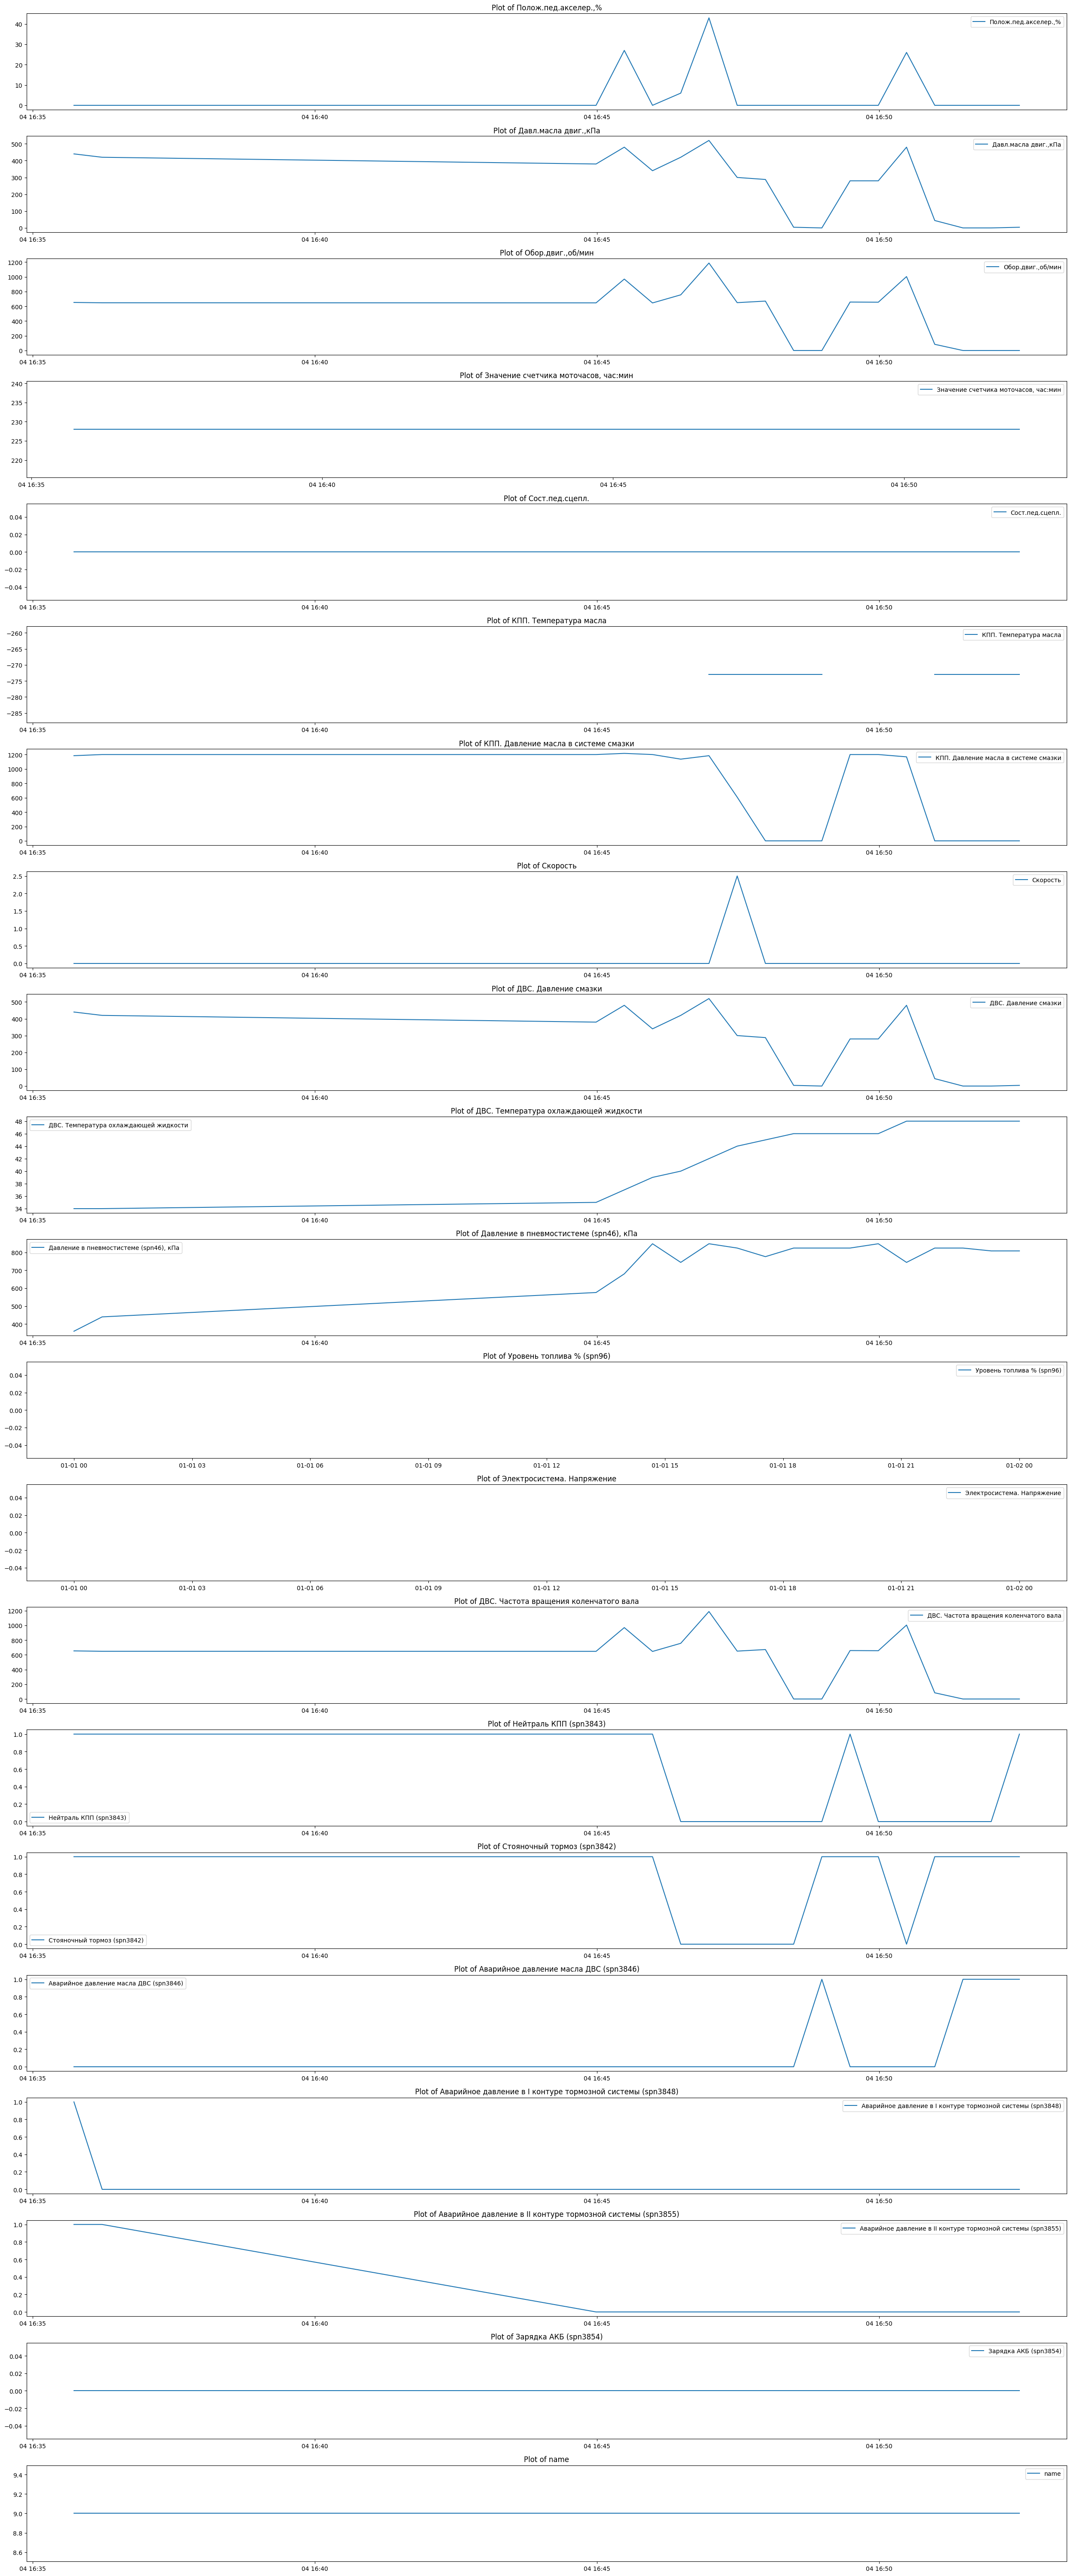

In [48]:
y_values = temp_prob.drop(columns='Темп.масла двиг.,°С').columns[1:]
fig, axs = plt.subplots(len(y_values), 1, figsize=(25, 60))
labels = temp_prob.drop(columns='Темп.масла двиг.,°С').columns[1:]

for i, (y, label) in enumerate(zip(y_values, labels)):
    axs[i].plot(temp_prob[temp_prob['name']==9]['Дата и время'], pd.to_numeric(temp_prob[temp_prob['name']==9][y]), label=label)
    axs[i].set_title(f'Plot of {label}')
    axs[i].legend()

plt.tight_layout()
plt.show()

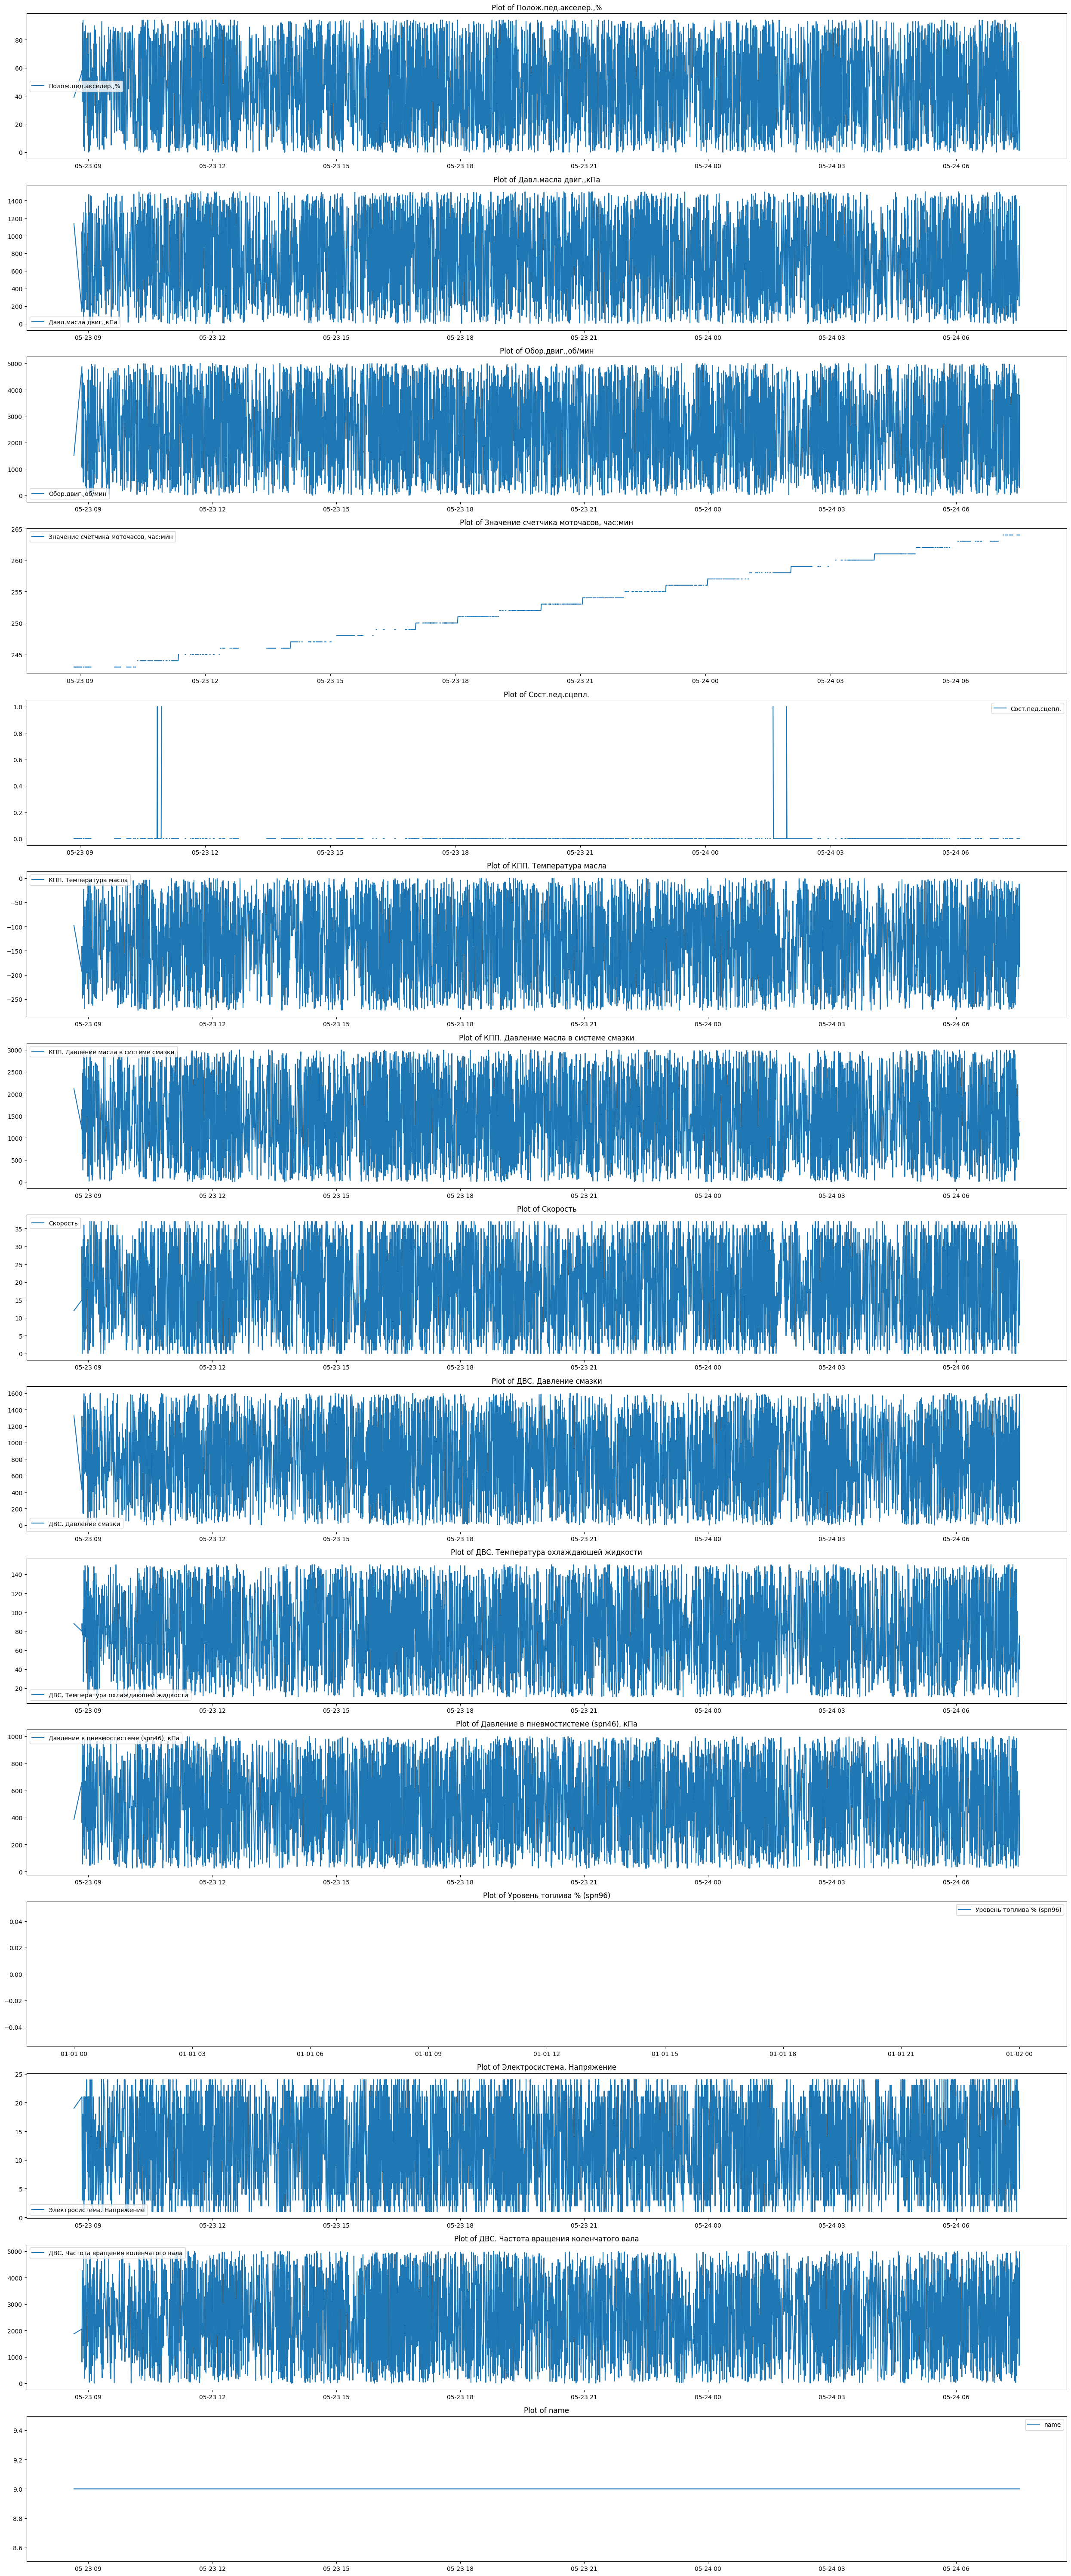

In [47]:
y_values = temp_anom.drop(columns='Темп.масла двиг.,°С').columns[1:]
fig, axs = plt.subplots(len(y_values), 1, figsize=(25, 60))
labels = temp_anom.drop(columns='Темп.масла двиг.,°С').columns[1:]

for i, (y, label) in enumerate(zip(y_values, labels)):
    axs[i].plot(temp_anom[temp_anom['name']==9]['Дата и время'], pd.to_numeric(temp_anom[temp_anom['name']==9][y]), label=label)
    axs[i].set_title(f'Plot of {label}')
    axs[i].legend()

plt.tight_layout()
plt.show()